# Analysis of "helpful" reviews

## Load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load data
data=pd.read_csv("helpful_data_multisemester_balanced.csv")
data.head()

,TAG,REVIEW
0,1,The team has added details about UI testing. \...
1,0,Overall explanation of the changes that need t...
2,0,I find it a little confusing. But the diagrams...
3,0,"Yes, the explanation is elaborative and complete."
4,1,The design appears to be simple for the most p...


## Initial exploration and processing

In [2]:
# Calculate reviews' length
for row in data:
    data['length']=[len(data.loc[line,'REVIEW'])for line in data.index]

data.head()

,TAG,REVIEW,length
0,1,The team has added details about UI testing. \...,201
1,0,Overall explanation of the changes that need t...,77
2,0,I find it a little confusing. But the diagrams...,111
3,0,"Yes, the explanation is elaborative and complete.",49
4,1,The design appears to be simple for the most p...,236


In [3]:
# Calculate reviews' readability indices
import textstat
for row in data:
    data['ARI']=[textstat.automated_readability_index(data.loc[line,'REVIEW'])for line in data.index] # Automated readability index
    data['CLI']=[textstat.coleman_liau_index(data.loc[line,'REVIEW'])for line in data.index] #The Coleman-Liau Index
    data['FRE']=[textstat.flesch_reading_ease(data.loc[line,'REVIEW'])for line in data.index] # Flesch Reading Ease
    data['FOG']=[textstat.gunning_fog(data.loc[line,'REVIEW'])for line in data.index] # Gunning fog index

data.head()

,TAG,REVIEW,length,ARI,CLI,FRE,FOG
0,1,The team has added details about UI testing. \...,201,19.3,12.66,37.98,20.47
1,0,Overall explanation of the changes that need t...,77,7.1,8.63,74.19,8.46
2,0,I find it a little confusing. But the diagrams...,111,6.4,8.73,61.83,12.22
3,0,"Yes, the explanation is elaborative and complete.",49,11.0,14.04,30.53,14.23
4,1,The design appears to be simple for the most p...,236,7.2,8.05,73.88,8.51


In [4]:
from textblob import TextBlob

In [5]:
# Calculate reviews' subjectivity and polarity
data['subjectivity']=0
data['polarity']=0
for idx,row in data.iterrows():
    text=TextBlob(data.loc[idx,'REVIEW'])
    data.loc[idx,'subjectivity']=text.sentiment.subjectivity
    data.loc[idx,'polarity']=text.sentiment.polarity

data.head()

,TAG,REVIEW,length,ARI,CLI,FRE,FOG,subjectivity,polarity
0,1,The team has added details about UI testing. \...,201,19.3,12.66,37.98,20.47,0.500000,0.500000
1,0,Overall explanation of the changes that need t...,77,7.1,8.63,74.19,8.46,0.461111,0.116667
2,0,I find it a little confusing. But the diagrams...,111,6.4,8.73,61.83,12.22,0.300000,-0.162500
3,0,"Yes, the explanation is elaborative and complete.",49,11.0,14.04,30.53,14.23,0.400000,0.100000
4,1,The design appears to be simple for the most p...,236,7.2,8.05,73.88,8.51,0.414286,-0.025000


In [6]:
from math import log2

def entropy(str):
    def shannon(boe):
        total = sum(boe.values()) 
        return sum(freq / total * log2(total / freq) for freq in boe.values())

    list = str.split(" ") 
    dict = {}
    for key in list: 
        if dict.get(key) == None: 
            dict[key] = 1
        else:
            dict[key] += 1 
    return shannon(dict)

In [7]:
# Calculate reviews' entropy
data['entropy']=0
for idx,row in data.iterrows():
    data.loc[idx,'entropy']=entropy(data.loc[idx,'REVIEW'])

data.head()

,TAG,REVIEW,length,ARI,CLI,FRE,FOG,subjectivity,polarity,entropy
0,1,The team has added details about UI testing. \...,201,19.3,12.66,37.98,20.47,0.500000,0.500000,4.851410
1,0,Overall explanation of the changes that need t...,77,7.1,8.63,74.19,8.46,0.461111,0.116667,3.664498
2,0,I find it a little confusing. But the diagrams...,111,6.4,8.73,61.83,12.22,0.300000,-0.162500,3.997670
3,0,"Yes, the explanation is elaborative and complete.",49,11.0,14.04,30.53,14.23,0.400000,0.100000,2.807355
4,1,The design appears to be simple for the most p...,236,7.2,8.05,73.88,8.51,0.414286,-0.025000,4.997677


In [8]:
# Description satatistic
data.describe()

,TAG,length,ARI,CLI,FRE,FOG,subjectivity,polarity,entropy
count,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000
mean,0.500000,159.205290,9.227456,8.843781,69.295345,9.503758,0.383871,0.129025,4.033290
std,0.500063,155.706841,6.372080,4.737321,23.258987,5.182824,0.261353,0.234410,1.051253
min,0.000000,2.000000,-11.600000,-33.810000,-162.360000,0.400000,0.000000,-0.800000,0.000000
25%,0.000000,62.000000,5.600000,6.512500,57.610000,6.220000,0.189268,0.000000,3.321928
50%,0.500000,119.000000,8.400000,8.830000,71.310000,8.960000,0.414214,0.068182,4.121928
75%,1.000000,204.000000,11.700000,11.140000,83.320000,11.940000,0.550000,0.250000,4.793011
max,1.000000,3336.000000,67.100000,52.150000,145.930000,57.140000,1.000000,1.000000,7.201250


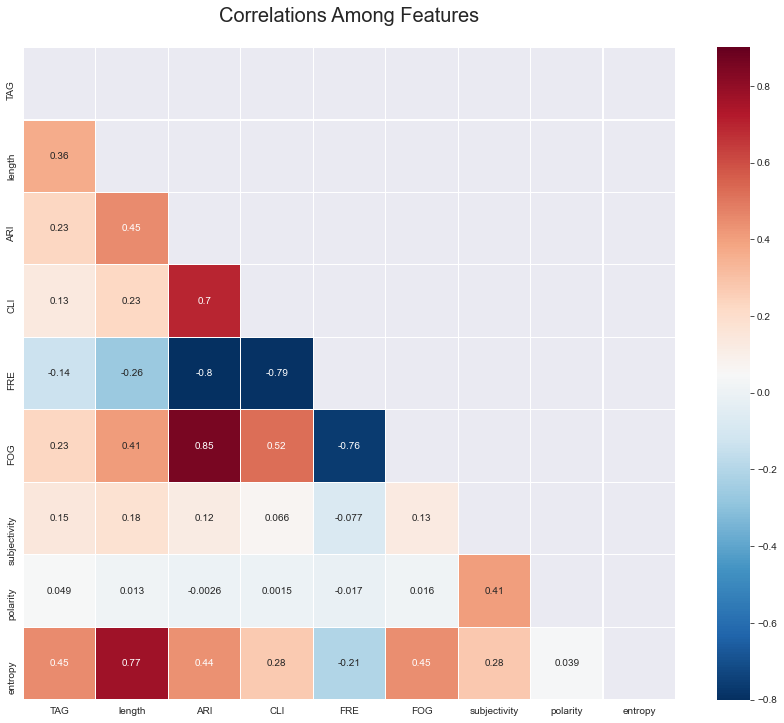

In [9]:
# Calculate Pearson coefficient of correlation
sns.set_style("darkgrid")
select = ['TAG','length', 'ARI', 'CLI', 'FRE', 'FOG', 'subjectivity', 'polarity', 'entropy']
mask = np.zeros_like(data[select].corr(), dtype=np.bool)  
# Visualize correlation coefficients as a heatmap
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,12))
sns.heatmap(data[select].corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

[6.05877948e-125 2.88980748e-050 1.52617046e-017 6.39154046e-018
 3.21094440e-050 1.11362575e-020 2.07734557e-003 6.59532770e-201]
selected index: [0 1 4 5 7]


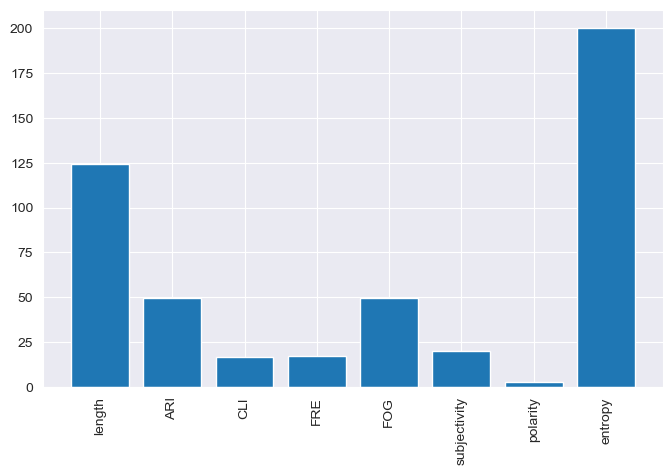

In [10]:
# Select features
from sklearn.feature_selection import SelectKBest,f_classif
predictors=['length', 'ARI', 'CLI', 'FRE', 'FOG', 'subjectivity', 'polarity', 'entropy']
# The SelectKBest method selects the features according to the k highest score
sel=SelectKBest(f_classif,k=5)
sel.fit(data[predictors],data['TAG']) 
# Get the raw p-values for each feature, and transform from p-values into scores
print(sel.pvalues_)
scores=-np.log10(sel.pvalues_)
print('selected index:',sel.get_support(True))
# Plot the scores
plt.figure(figsize=(8,5),dpi=100)
plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation='vertical')
plt.show()


# Predicting "helpfulness"

In [11]:
from sklearn import feature_selection  
from sklearn import model_selection
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,roc_auc_score
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

E:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


## Split the data

In [12]:
Target = ['TAG']
data_columns=['length', 'ARI','CLI', 'FRE','FOG','subjectivity','entropy']
#data_columns=['length', 'ARI', 'CLI', 'FRE', 'FOG', 'subjectivity', 'polarity', 'entropy']
columns = Target + data_columns

# Split the data to train data and test data
X_train, X_test, y_train, y_test = model_selection.train_test_split(data[data_columns],data[Target], random_state = 0)

In [13]:
X_train.head(10)

,length,ARI,CLI,FRE,FOG,subjectivity,entropy
1687,215,8.8,11.06,59.60,10.39,0.000000,4.479143
217,140,13.6,11.03,64.04,14.60,0.041667,4.584963
670,38,0.8,2.10,114.12,3.20,0.427273,3.000000
1303,233,13.3,13.22,36.28,13.87,0.725000,5.047291
3417,60,5.5,6.82,102.61,4.40,0.600000,3.459432
1673,47,6.1,8.66,71.82,8.20,0.750000,3.000000
3477,138,15.5,15.03,41.70,14.11,0.327778,4.201841
1013,89,8.4,7.83,72.16,8.90,0.595238,3.875000
3014,109,11.6,11.77,70.13,11.64,0.400000,4.058814
3246,162,9.2,10.90,66.23,9.84,0.500000,4.392747


## Train models

In [14]:
alg1=LogisticRegression(max_iter=1000,random_state=25)
alg2=SVC(probability=True,random_state=25)  # SVM
alg3=RandomForestClassifier(random_state=25)# Random Forest
alg4=AdaBoostClassifier(random_state=25)# AdaBoost
alg5=GradientBoostingClassifier(random_state=25)

In [15]:
scores=[]
methods=["LogisticRegression","SVM","RandomForest","AdaBoost","GradientBoosting"]
# LogisticRegression
alg1_1 = alg1.fit(X_train, y_train.values.ravel())
score = alg1_1.score(X_test, y_test)
scores.append(score)
# SVM
alg2_2 = alg2.fit(X_train, pd.DataFrame(y_train).values.ravel())
score2 = alg2_2.score(X_test, y_test)
scores.append(score2)
# Random Forest
alg3_3 = alg3.fit(X_train, pd.DataFrame(y_train).values.ravel())
score3 = alg3_3.score(X_test, y_test)
scores.append(score3)
# AdaBoost
alg4_4 = alg4.fit(X_train, pd.DataFrame(y_train).values.ravel())
score4 = alg4_4.score(X_test, y_test)
scores.append(score4)
# GradientBoosting
alg5_5 = alg5.fit(X_train, pd.DataFrame(y_train).values.ravel())
score5 = alg5_5.score(X_test, y_test)
scores.append(score5)
scores

[0.6988922457200403,
 0.702920443101712,
 0.6717019133937563,
 0.6837865055387714,
 0.6938569989929506]

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy'>

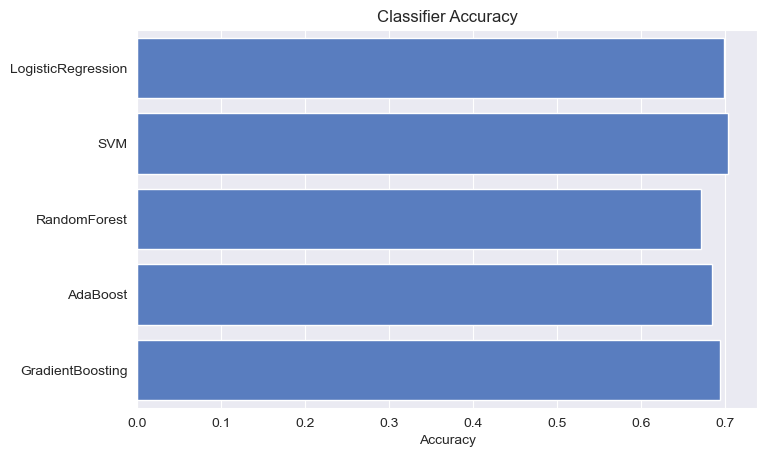

In [16]:
plt.figure(figsize=(8,5),dpi=100)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x=scores,y=methods,color="b")

## Tune the best models using grid search

In [17]:
def fit_model(alg,parameters):
    scorer=make_scorer(roc_auc_score)
    grid = GridSearchCV(alg,parameters,scoring=scorer,cv=5)
    start=time()  #计时
    grid=grid.fit(X_train, pd.DataFrame(y_train).values.ravel())
    end=time()
    t=round(end-start,3)
    print(round(grid.best_score_, 4))
    print (grid.best_params_)
    print ('searching time for {} is {} s'.format(alg.__class__.__name__,t)) 
    return grid

In [18]:
# The range of parameters
parameters1={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
parameters2 = {"C":range(1,10), "gamma": [0.05,0.1,0.15,0.2,0.25]}
parameters3_1 = {'n_estimators':range(10,200,10)}
parameters3_2 = {'max_depth':range(1,10),'min_samples_split':range(2,10)}
parameters4 = {'n_estimators':range(10,200,10),'learning_rate':[i/10.0 for i in range(5,15)]}
parameters5={'n_estimators':range(20,81,10)}

The grid search takes a long time, I only find out the optimal parameters of the logistic regression, the optimal parameters of other models have not been found out yet.

In [19]:
# Logistic Regression
clf1=fit_model(alg1,parameters1)
print("-" * 10)

0.7118
{'C': 0.01}
searching time for LogisticRegression is 1.767 s
----------


In [57]:
# SVM
clf2=fit_model(alg2,parameters2)
print("-" * 10)

KeyboardInterrupt: 

In [ ]:
# RandomForest
# firsttime
clf3=fit_model(alg3,parameters3_1)
print("-" * 10)
# secondtime
alg3=RandomForestClassifier(random_state=29,n_estimators=180)
clf3_1=fit_model(alg3,parameters3_2)
print("-" * 10)

In [58]:
# AdaBoost
clf4=fit_model(alg4,parameters4)
print("-" * 10)

KeyboardInterrupt: 

In [ ]:
# GradientBoosting
clf4=fit_model(alg5,parameters5)
print("-" * 10)

## Results with best parameters

In [20]:
alg1=LogisticRegression(C=0.01,random_state=25)
alg2=SVC(C=1,gamma=0.001,kernel='rbf',probability=True,random_state=25)
alg3=RandomForestClassifier(n_estimators=170,max_depth=4,min_samples_split=2,random_state=25)
alg4=AdaBoostClassifier(learning_rate=0.5,n_estimators=10,random_state=25)
alg5=GradientBoostingClassifier(random_state=25)

In [21]:
scores=[]
methods=["LogisticRegression","SVM","RandomForest","AdaBoost","GradientBoosting"]
# Logistic Regression
alg1_1 = alg1.fit(X_train, y_train.values.ravel())
score = alg1_1.score(X_test, y_test)
scores.append(score)
# SVM
alg2_2 = alg2.fit(X_train, pd.DataFrame(y_train).values.ravel())
score2 = alg2_2.score(X_test, y_test)
scores.append(score2)
# Random Forest
alg3_3 = alg3.fit(X_train, pd.DataFrame(y_train).values.ravel())
score3 = alg3_3.score(X_test, y_test)
scores.append(score3)
# AdaBoost
alg4_4 = alg4.fit(X_train, pd.DataFrame(y_train).values.ravel())
score4 = alg4_4.score(X_test, y_test)
scores.append(score4)
# GradientBoosting
alg5_5 = alg5.fit(X_train, pd.DataFrame(y_train).values.ravel())
score5 = alg5_5.score(X_test, y_test)
scores.append(score5)
scores

[0.7039274924471299,
 0.7069486404833837,
 0.7059415911379657,
 0.6968781470292045,
 0.6938569989929506]

<AxesSubplot:title={'center':'Classifier Accuracy(Ajusted)'}, xlabel='Accuracy'>

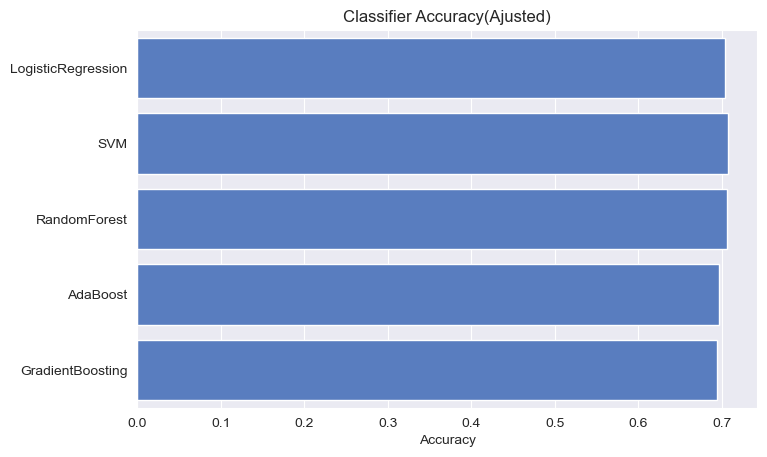

In [22]:
plt.figure(figsize=(8,5),dpi=100)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy(Ajusted)')
sns.set_color_codes("muted")
sns.barplot(x=scores,y=methods,color="b")